# **First Home Assignment**

**Pedro Oliveira - 52764**

**Rodrigo Ferreira - 51032**

**Rui Roque - 57588**

Importação das bibliotecas necessárias:

In [206]:
import pandas as pd
import numpy  as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import f1_score, classification_report


Importação do ficheiro.
É logo transformado num conjunto de dados.

In [207]:
ds = pd.read_csv("PD_21_22_HA1_dataset.txt",sep="\t")

ds

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,40,0.565,0.292,8,-13.124,1,0.0255,0.889000,0.001260,0.1120,0.2170,78.535,3.503633,1,0
1,1,0.558,0.439,1,-9.676,1,0.0274,0.248000,0.001650,0.1020,0.0381,103.958,4.947117,1,0
2,21,0.472,0.534,2,-10.742,0,0.0342,0.760000,0.086100,0.0893,0.3830,184.014,4.972833,1,0
3,35,0.594,0.619,1,-11.123,0,0.0478,0.597000,0.000144,0.0694,0.3850,89.691,5.835783,1,0
4,21,0.732,0.550,2,-8.711,0,0.0397,0.809000,0.091000,0.0914,0.2350,132.974,6.133783,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,42,0.370,0.476,3,-12.730,0,0.0535,0.101000,0.002520,0.0779,0.2940,119.337,344400.000000,5,10
11809,30,0.388,0.968,8,-4.736,1,0.0686,0.000993,0.001450,0.9130,0.4120,128.907,387874.000000,5,10
11810,29,0.393,0.623,9,-13.091,1,0.0476,0.128000,0.001060,0.0919,0.2860,165.069,408000.000000,5,10
11811,21,0.305,0.501,2,-10.179,0,0.0337,0.098400,0.419000,0.1380,0.3490,90.574,422213.000000,5,10


In [208]:
ds.shape


(11813, 15)

De seguida é verificado se existe algum valor nulo no conjunto de dados:

In [209]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11813 entries, 0 to 11812
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          11813 non-null  int64  
 1   danceability        11813 non-null  float64
 2   energy              11813 non-null  float64
 3   key                 11813 non-null  int64  
 4   loudness            11813 non-null  float64
 5   mode                11813 non-null  int64  
 6   speechiness         11813 non-null  float64
 7   acousticness        11813 non-null  float64
 8   instrumentalness    11813 non-null  float64
 9   liveness            11813 non-null  float64
 10  valence             11813 non-null  float64
 11  tempo               11813 non-null  float64
 12  duration_in min/ms  11813 non-null  float64
 13  time_signature      11813 non-null  int64  
 14  Class               11813 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 1.4 MB


Uma outra maneira de verificar se existem valores nulos em cada feature:

In [210]:
pd.isnull(ds).sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Aqui verificamos a distribuição de observações por cada classe, o que também será importante para definirmos a métrica para avaliar o nosso modelo.

In [211]:
ds["Class"].value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

Representação dos valores de cada feature a partir de um histograma:

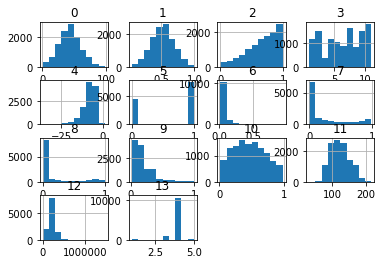

In [212]:
ds_array = np.array(ds)
dataFeatures = np.array(ds.columns)

x = ds_array[:, :-1]

dataset = pd.DataFrame(x)
dataset.hist()
pyplot.show()

A escala é bastante reduzida mas algumas features pareciam ter um número bastante reduzido de valores distintos. Por isso decidimos ir verificar os valores de cada variável e pudemos verificar que o *mode* só tem 2 valores e a *time_signature* tem 4.

In [213]:
f = ["Popularity", "danceability", "energy", "key", "mode","loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_in min/ms", "time_signature"]

for i in f:
    print(i, ":\n")
    print(ds[i].value_counts())
    print("\n")

Popularity :

42    324
41    317
43    309
34    309
40    303
     ... 
94      2
93      2
98      1
97      1
91      1
Name: Popularity, Length: 97, dtype: int64


danceability :

0.5270    48
0.5330    43
0.5450    41
0.4890    41
0.6010    40
          ..
0.0890     1
0.0882     1
0.0828     1
0.1210     1
0.9520     1
Name: danceability, Length: 873, dtype: int64


energy :

0.9310    43
0.9480    41
0.9320    40
0.9130    39
0.9710    39
          ..
0.0190     1
0.0422     1
0.0945     1
0.0872     1
0.3120     1
Name: energy, Length: 1147, dtype: int64


key :

7     1626
2     1526
9     1495
4     1155
1     1153
11    1063
5     1031
6      874
8      818
10     720
3      352
Name: key, dtype: int64


mode :

1    7371
0    4442
Name: mode, dtype: int64


loudness :

-4.261     10
-5.497     10
-6.237      9
-5.576      9
-5.659      9
           ..
-10.109     1
-14.122     1
-14.754     1
-6.822      1
-17.467     1
Name: loudness, Length: 7121, dtype: int64


speechin

Criação de uma função que discretiza os valores da classe para string:

In [214]:
def discreteClass(df):
    conditions = [
        (df["Class"] == 0),
        (df["Class"] == 1),
        (df["Class"] == 2),
        (df["Class"] == 3),
        (df["Class"] == 4),
        (df["Class"] == 5),
        (df["Class"] == 6),
        (df["Class"] == 7),
        (df["Class"] == 8),
        (df["Class"] == 9),
        (df["Class"] == 10)
    ]
    
    values = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]

    df["yc"] = np.select(conditions, values)

    df = df.drop(labels= ["Class"], axis=1)

    return df

ds = discreteClass(ds)


Com base no histograma acima e no número de valores possíveis em cada *feature*, a *feature mode* apenas contém dois valores possíveis, sendo assim o próximo passo passa por mudar o tipo desta *feature* para *string*.

In [215]:
mode = ds["mode"].apply(str)
mode

0        1
1        1
2        0
3        0
4        0
        ..
11808    0
11809    1
11810    1
11811    0
11812    0
Name: mode, Length: 11813, dtype: object

De seguida, a *feature mode* é eliminada do conjunto de dados de forma a que as outras features sejam discretizadas.

In [216]:
ds = ds.drop(['mode'], axis=1)
ds

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,yc
0,40,0.565,0.292,8,-13.124,0.0255,0.889000,0.001260,0.1120,0.2170,78.535,3.503633,1,A
1,1,0.558,0.439,1,-9.676,0.0274,0.248000,0.001650,0.1020,0.0381,103.958,4.947117,1,A
2,21,0.472,0.534,2,-10.742,0.0342,0.760000,0.086100,0.0893,0.3830,184.014,4.972833,1,A
3,35,0.594,0.619,1,-11.123,0.0478,0.597000,0.000144,0.0694,0.3850,89.691,5.835783,1,A
4,21,0.732,0.550,2,-8.711,0.0397,0.809000,0.091000,0.0914,0.2350,132.974,6.133783,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,42,0.370,0.476,3,-12.730,0.0535,0.101000,0.002520,0.0779,0.2940,119.337,344400.000000,5,K
11809,30,0.388,0.968,8,-4.736,0.0686,0.000993,0.001450,0.9130,0.4120,128.907,387874.000000,5,K
11810,29,0.393,0.623,9,-13.091,0.0476,0.128000,0.001060,0.0919,0.2860,165.069,408000.000000,5,K
11811,21,0.305,0.501,2,-10.179,0.0337,0.098400,0.419000,0.1380,0.3490,90.574,422213.000000,5,K


O mesmo método utilizado na *feature mode* é aplicado mas desta vez para a *feature time_signature* que apenas contém 4 valores distintos

In [217]:
time_signature = ds["time_signature"].apply(str)
time_signature

0        1
1        1
2        1
3        1
4        1
        ..
11808    5
11809    5
11810    5
11811    5
11812    5
Name: time_signature, Length: 11813, dtype: object

In [218]:
ds = ds.drop(['time_signature'], axis=1)
ds

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,yc
0,40,0.565,0.292,8,-13.124,0.0255,0.889000,0.001260,0.1120,0.2170,78.535,3.503633,A
1,1,0.558,0.439,1,-9.676,0.0274,0.248000,0.001650,0.1020,0.0381,103.958,4.947117,A
2,21,0.472,0.534,2,-10.742,0.0342,0.760000,0.086100,0.0893,0.3830,184.014,4.972833,A
3,35,0.594,0.619,1,-11.123,0.0478,0.597000,0.000144,0.0694,0.3850,89.691,5.835783,A
4,21,0.732,0.550,2,-8.711,0.0397,0.809000,0.091000,0.0914,0.2350,132.974,6.133783,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,42,0.370,0.476,3,-12.730,0.0535,0.101000,0.002520,0.0779,0.2940,119.337,344400.000000,K
11809,30,0.388,0.968,8,-4.736,0.0686,0.000993,0.001450,0.9130,0.4120,128.907,387874.000000,K
11810,29,0.393,0.623,9,-13.091,0.0476,0.128000,0.001060,0.0919,0.2860,165.069,408000.000000,K
11811,21,0.305,0.501,2,-10.179,0.0337,0.098400,0.419000,0.1380,0.3490,90.574,422213.000000,K


Separação do conjunto de dados em *features* (X) e classe/*target* (y)

In [219]:
ds_array = np.array(ds)
dataFeatures = np.array(ds.columns)

X = ds_array[:, :-1]
y = ds_array[:, -1]

class_names = ds.yc.unique()

features = dataFeatures[:-1]
target = dataFeatures[-1]


print("features:\n", features, "\n")
print("target:", target, "\n")
print("X Shape: ", X.shape)
print("Y shape: ", y.shape)

features:
 ['Popularity' 'danceability' 'energy' 'key' 'loudness' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo'
 'duration_in min/ms'] 

target: yc 

X Shape:  (11813, 12)
Y shape:  (11813,)


De forma a melhorar o desempenho do nosso modelo, vamos discretizar o modelo e escolhemos fazê-lo usando os quartis de 20, 40, 60 e 80.

In [220]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data = trans.fit_transform(X)

data

array([[2., 2., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 4., 0.],
       ...,
       [0., 1., 1., ..., 1., 4., 4.],
       [0., 0., 1., ..., 1., 0., 4.],
       [0., 2., 0., ..., 1., 3., 4.]])

Depois de efetuada a discretização dos dados, é feita a alteração do tipo das *features* para *string*

In [221]:
df_X = pd.DataFrame(data)
df_X.columns = features
df_X = df_X.applymap(str)

São reinseridas as *features* anteriormente removidas do conjunto de dados (*mode* e *time_signature*) e de seguida é utilizado o método *get_dummies* de maneira a obtermos um conjunto de dados que contém apenas valores binários

In [222]:
df_X["time_signature"] = time_signature
df_X["mode"] = mode
df_X

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,mode
0,2.0,2.0,0.0,3.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,1,1
1,0.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0,1.0,0.0,1,1
2,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,0.0,1.0,4.0,0.0,1,0
3,1.0,3.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,2.0,0.0,0.0,1,0
4,0.0,4.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,3.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,2.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,4.0,5,0
11809,1.0,1.0,4.0,3.0,4.0,3.0,1.0,2.0,4.0,2.0,3.0,4.0,5,1
11810,0.0,1.0,1.0,4.0,0.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,5,1
11811,0.0,0.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,0.0,4.0,5,0


In [223]:
Xc = pd.get_dummies(df_X, drop_first=False).values
Xc

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]], dtype=uint8)

### Objetivo 1 - Seleção do modelo

De maneira a selecionar o melhor modelo, foi criada uma função que utiliza o conjunto de treino para a validação cruzada de n ficheiros, retornando um conjunto de testes, e os valores previstos utilizando esse mesmo conjunto de testes. 

In [224]:
def modelSelection(X_TRAIN, y_TRAIN, model):
    kf = KFold(n_splits=5, shuffle=True)

    TRUTH=None
    PREDS=None

    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        
        mdl = model
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))

    return TRUTH, PREDS, X_test, y_test

O primeiro passo efetuado para selecionar o modelo foi separar o conjunto de dados em:

- conjunto de treino
- conjunto independentes de validação


In [225]:
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(Xc, y, test_size=0.25, random_state=123)


De seguida é verificado qual o *alpha* que permite ao modelo *categoricalNB* apresentar os melhores resultados, para isto foi utilizada a função *modelSelection* definida em cima onde optou-se pelo coeficiente de correlação Mathews como a métrica para descobrir o melhor *alpha*. 

In [226]:
models = [CategoricalNB(alpha=0.0001),CategoricalNB(alpha=0.001), CategoricalNB(alpha=0.01), CategoricalNB(alpha=1)]

mc = 0
ac = 0

for i in models:
    t, p, XTest, yTest = modelSelection(X_TRAIN, y_TRAIN, i)
    corrcoef = matthews_corrcoef(t, p)
    accuracy = accuracy_score(t, p)
    if(corrcoef > mc):
        betterModel = i
        mc = corrcoef
        TRUTH = t
        PREDS = p
        X_test = XTest
        y_test = yTest

print("Best Model: ", betterModel)

Better Model:  CategoricalNB(alpha=0.001)


Por tratar-se de um problema de classificação de multiclasses, foi analisada a accuracy, o coeficiente de correlação Matthews e apresentada a matriz de confusão, de maneira a avaliar a qualidade do modelo. 

In [227]:
print(classification_report(TRUTH, PREDS))
print("MCC:", matthews_corrcoef(TRUTH, PREDS))
pd.DataFrame(confusion_matrix(TRUTH, PREDS), columns=class_names, index=class_names)


              precision    recall  f1-score   support

           A       0.48      0.55      0.51       289
           B       0.18      0.01      0.02       771
           C       0.38      0.40      0.39       717
           D       0.56      0.62      0.59       207
           E       0.28      0.44      0.35       102
           F       0.42      0.60      0.50       378
           G       0.38      0.33      0.35      1540
           H       0.81      0.93      0.87       333
           I       0.50      0.69      0.58      1159
           J       0.30      0.32      0.31       824
           K       0.46      0.48      0.47      2539

    accuracy                           0.45      8859
   macro avg       0.43      0.49      0.45      8859
weighted avg       0.42      0.45      0.42      8859

MCC: 0.3451857239461076


,A,B,C,D,E,F,G,H,I,J,K
A,159,1,3,32,28,2,7,28,1,13,15
B,7,7,54,1,11,37,193,5,96,68,292
C,10,2,290,23,0,25,79,6,34,80,168
D,34,0,1,129,10,2,0,16,0,11,4
E,33,0,0,3,45,1,1,1,0,9,9
F,4,3,13,1,2,228,32,0,1,56,38
G,27,10,130,10,10,76,507,15,150,171,434
H,11,0,0,7,0,0,2,311,0,1,1
I,3,2,12,0,0,4,86,0,795,6,251
J,24,5,75,8,15,115,114,1,14,267,186


Após a avaliação do modelo ***categoricalNB***, o mesmo procedimento é efetuado para o modelo ***GaussianNB***, sendo que para este modelo apenas é testado utilizando os valores *default* dos parâmetros.

In [228]:
TRUTH, PREDS, X_test2, y_test2 = modelSelection(X_TRAIN, y_TRAIN, GaussianNB())

In [229]:
print(classification_report(TRUTH, PREDS))
print("MCC:", matthews_corrcoef(TRUTH, PREDS))
pd.DataFrame(confusion_matrix(TRUTH, PREDS), columns=class_names, index=class_names)


              precision    recall  f1-score   support

           A       0.25      0.12      0.17       289
           B       0.15      0.03      0.05       771
           C       0.32      0.48      0.38       717
           D       0.31      0.57      0.40       207
           E       0.13      0.82      0.22       102
           F       0.32      0.54      0.41       378
           G       0.39      0.22      0.28      1540
           H       0.66      0.96      0.78       333
           I       0.43      0.78      0.55      1159
           J       0.23      0.33      0.27       824
           K       0.49      0.24      0.32      2539

    accuracy                           0.37      8859
   macro avg       0.34      0.46      0.35      8859
weighted avg       0.38      0.37      0.34      8859

MCC: 0.2886103067756096


,A,B,C,D,E,F,G,H,I,J,K
A,36,0,0,69,115,0,0,69,0,0,0
B,9,21,90,14,35,57,119,6,152,128,140
C,3,9,342,27,16,45,37,13,56,98,71
D,6,0,0,117,46,0,0,38,0,0,0
E,1,0,0,6,84,0,0,10,0,0,1
F,19,7,18,22,12,206,24,2,11,45,12
G,24,49,211,35,67,105,334,21,225,258,211
H,3,0,0,7,4,0,0,319,0,0,0
I,1,9,21,2,14,8,69,1,899,20,115
J,20,5,96,41,96,128,65,3,23,271,76


Considerando os resultados obtidos anteriormente, o modelo escolhido foi o categoricalNB com *alpha*=0.001, por apresentar um maior coeficiente de correlação entre os dados e uma melhor *accuracy* do que o modelo GaussianNB().

Desta forma passou-se agora para o treino do modelo mas desta vez utilizando todo o conjunto de treino: 

In [230]:
mdl = betterModel
mdl.fit(X_TRAIN, y_TRAIN)


CategoricalNB(alpha=0.001)

In [231]:
ivs_preds = mdl.predict(X_IVS)

ivs_preds

print(classification_report(y_IVS, ivs_preds))
print("MCC:", matthews_corrcoef(y_IVS, ivs_preds))
pd.DataFrame(confusion_matrix(y_IVS, ivs_preds), columns=class_names, index=class_names)


              precision    recall  f1-score   support

           A       0.50      0.59      0.54        97
           B       0.00      0.00      0.00       266
           C       0.36      0.38      0.37       239
           D       0.51      0.60      0.55        63
           E       0.40      0.50      0.45        46
           F       0.36      0.49      0.41       139
           G       0.36      0.32      0.34       499
           H       0.80      0.90      0.85       131
           I       0.48      0.72      0.58       364
           J       0.29      0.33      0.31       275
           K       0.44      0.43      0.43       835

    accuracy                           0.43      2954
   macro avg       0.41      0.48      0.44      2954
weighted avg       0.39      0.43      0.40      2954

MCC: 0.33049982316709065


,A,B,C,D,E,F,G,H,I,J,K
A,57,0,0,9,7,0,5,11,0,2,6
B,2,0,21,0,3,16,76,2,38,23,85
C,4,0,92,5,0,5,29,1,10,34,59
D,8,0,0,38,2,0,1,8,0,6,0
E,13,0,0,3,23,0,0,0,0,5,2
F,4,0,8,3,0,68,16,0,1,19,20
G,5,3,41,2,4,35,160,7,53,41,148
H,7,0,0,3,0,0,3,118,0,0,0
I,0,0,5,0,0,1,20,0,263,2,73
J,8,0,21,7,8,49,27,0,3,90,62


## Objective 2

Grupo 14: 1+4 = 5
classe positiva = 5

In [232]:
ds = pd.read_csv("PD_21_22_HA1_dataset.txt",sep="\t")

ds

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,40,0.565,0.292,8,-13.124,1,0.0255,0.889000,0.001260,0.1120,0.2170,78.535,3.503633,1,0
1,1,0.558,0.439,1,-9.676,1,0.0274,0.248000,0.001650,0.1020,0.0381,103.958,4.947117,1,0
2,21,0.472,0.534,2,-10.742,0,0.0342,0.760000,0.086100,0.0893,0.3830,184.014,4.972833,1,0
3,35,0.594,0.619,1,-11.123,0,0.0478,0.597000,0.000144,0.0694,0.3850,89.691,5.835783,1,0
4,21,0.732,0.550,2,-8.711,0,0.0397,0.809000,0.091000,0.0914,0.2350,132.974,6.133783,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,42,0.370,0.476,3,-12.730,0,0.0535,0.101000,0.002520,0.0779,0.2940,119.337,344400.000000,5,10
11809,30,0.388,0.968,8,-4.736,1,0.0686,0.000993,0.001450,0.9130,0.4120,128.907,387874.000000,5,10
11810,29,0.393,0.623,9,-13.091,1,0.0476,0.128000,0.001060,0.0919,0.2860,165.069,408000.000000,5,10
11811,21,0.305,0.501,2,-10.179,0,0.0337,0.098400,0.419000,0.1380,0.3490,90.574,422213.000000,5,10


Função que discretiza os valores da classe para valores binários, passando a classe 5 para o valor 1 e as restantes classes para 0:

In [233]:
def discreteClass(df):
    conditions = [
        (df["Class"] == 0),
        (df["Class"] == 1),
        (df["Class"] == 2),
        (df["Class"] == 3),
        (df["Class"] == 4),
        (df["Class"] == 5),
        (df["Class"] == 6),
        (df["Class"] == 7),
        (df["Class"] == 8),
        (df["Class"] == 9),
        (df["Class"] == 10)
    ]
    
    values = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

    df["Binary_Class"] = np.select(conditions, values)

    df = df.drop(labels= ["Class"], axis=1)

    return df

ds = discreteClass(ds)

In [234]:
ds["Binary_Class"].value_counts()

0    11296
1      517
Name: Binary_Class, dtype: int64

Discretização das restantes features, utilizando os mesmos procedimentos utilizados no objetivo anterior:

In [235]:
mode = ds["mode"].apply(str)
ds = ds.drop(['mode'], axis=1)

time_signature = ds["time_signature"].apply(str)
ds = ds.drop(['time_signature'], axis=1)

In [236]:
ds_array = np.array(ds)
dataFeatures = np.array(ds.columns)

X = ds_array[:, :-1]
y = ds_array[:, -1]

features = dataFeatures[:-1]
target = dataFeatures[-1]


print("features:\n", features, "\n")
print("target:", target, "\n")
print("X Shape: ", X.shape)
print("Y shape: ", y.shape)

features:
 ['Popularity' 'danceability' 'energy' 'key' 'loudness' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo'
 'duration_in min/ms'] 

target: Binary_Class 

X Shape:  (11813, 12)
Y shape:  (11813,)


In [237]:
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data = trans.fit_transform(X)

data

array([[2., 2., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 4., 0.],
       ...,
       [0., 1., 1., ..., 1., 4., 4.],
       [0., 0., 1., ..., 1., 0., 4.],
       [0., 2., 0., ..., 1., 3., 4.]])

In [238]:
df_X = pd.DataFrame(data)
df_X.columns = features
df_X = df_X.applymap(str)

df_X["time_signature"] = time_signature
df_X["mode"] = mode

In [239]:
Xc = pd.get_dummies(df_X, drop_first=False).values
Xc

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0]], dtype=uint8)

### Objetivo 2 - Seleção do modelo

Para o objetivo 2 foi utilizado os mesmos procedimentos utilizados no objetivo 1, onde foram efetuados os seguintes passos:

- Divisão do conjunto de dados em conjunto de treino e conjunto de validação independente;

- Utilização do conjunto de treino na validação cruzada de 5 ficheiros;

- Alteração do parâmetro alpha no modelo *categoricalNB* e repetição do passo anterior;

- Treino do modelo que apresentou melhores resultados utilizando desta vez todo o conjunto de treino

- Utilização do IVS para verificar a qualidade do modelo final


In [240]:
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(Xc, y, test_size=0.25, random_state=123)


In [241]:
models = [CategoricalNB(alpha=0.0001),CategoricalNB(alpha=0.001), CategoricalNB(alpha=0.01), CategoricalNB(alpha=1)]

f1 = 0

for i in models:
    t, p, XTest, yTest = modelSelection(X_TRAIN, y_TRAIN, i)
    f1Score = f1_score(t, p)
    if(f1Score > f1):
        betterModel = i
        f1 = f1Score
        TRUTH = t
        PREDS = p
        X_test = XTest
        y_test = yTest

print("Best Model: ", betterModel)

Better Model:  CategoricalNB(alpha=0.0001)
[0. 0. 0. ... 0. 0. 0.]


In [242]:
print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))

These are the training set statistics:
The Precision is:  0.3956
The Recall is:  0.5767
The F1 score is:  0.4693
The Matthews correlation coefficient is:  0.4498


In [243]:
TRUTH2, PREDS2, X_test2, y_test2 = modelSelection(X_TRAIN, y_TRAIN, GaussianNB())

In [244]:
print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH2, PREDS2))
print("The Recall is: %7.4f" % recall_score(TRUTH2, PREDS2))
print("The F1 score is: %7.4f" % f1_score(TRUTH2, PREDS2))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH2, PREDS2))

These are the training set statistics:
The Precision is:  0.2210
The Recall is:  0.7566
The F1 score is:  0.3421
The Matthews correlation coefficient is:  0.3650


Segundo os resultados acima, é novamente selecionado o modelo *categoricalNB* devido ao facto de apresentar um melhor *f1 score* para além de uma maior correlação entre os dados.

In [245]:
mdl = betterModel
mdl.fit(X_TRAIN, y_TRAIN)

CategoricalNB(alpha=0.0001)

In [246]:
ivs_preds = mdl.predict(X_IVS)

ivs_preds

print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(y_IVS, ivs_preds))
print("The Recall is: %7.4f" % recall_score(y_IVS, ivs_preds))
print("The F1 score is: %7.4f" % f1_score(y_IVS, ivs_preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_IVS, ivs_preds))



These are the training set statistics:
The Precision is:  0.3140
The Recall is:  0.4676
The F1 score is:  0.3757
The Matthews correlation coefficient is:  0.3461
